# Gregory plot

This notebook shows how to use the Gregory diagnostic. Here we focus on the `Gregory` for the single model evaluation and the `PlotGregory` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.timeseries import Gregory

/LUMI_TYKKY_e0MDUMK/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly',
                'startdate': '1990-01-01',
                'enddate': '1999-12-31'}
toa_dict = {'catalog': 'obs',
            'model': 'CERES',
            'exp': 'ebaf-toa42',
            'source': 'monthly',
            'startdate': '1990-01-01',
            'enddate': '2020-12-31'}
t2m_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'startdate': '1990-01-01',
            'enddate': '2020-12-31'}
common_dict = {'loglevel': 'info'}

In [4]:
greg_dataset = Gregory(**dataset_dict,
                       **common_dict)

In [5]:
greg_dataset.run()

2025-08-28 13:41:13 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-08-28 13:41:13 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
2025-08-28 13:41:27 :: Gregory :: INFO     -> Computing the Gregory Plot for the ['monthly', 'annual'] frequency.
2025-08-28 13:41:27 :: Gregory :: INFO     -> Computing the 2t data.
2025-08-28 13:41:27 :: Gregory :: INFO     -> Computing the net TOA radiation data.
2025-08-28 13:41:27 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-08-28 13:41:28 ::

In [6]:
greg_t2m = Gregory(**t2m_dict,
                   **common_dict)
greg_t2m.run(t2m=True, net_toa=False, std=True)
greg_toa = Gregory(**toa_dict,
                   **common_dict)
greg_toa.run(t2m=False, net_toa=True, std=True)

ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
2025-08-28 13:41:31 :: Gregory :: INFO     -> Computing the Gregory Plot for the ['monthly', 'annual'] frequency.
2025-08-28 13:41:31 :: Gregory :: INFO     -> Computing the 2t data.
2025-08-28 13:41:32 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-08-28 13:41:42 :: OutputSaver :: INFO     -> Saved NetCDF: ./netcdf/gregory.gregory.obs.ERA5.era5.r1.2t.annual.std.nc
2025-08-28 13:41:42 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-08-28 13:41:50 :: OutputSaver :: INFO     -> Saved NetCDF: ./netcdf/gregory.gregory.obs.ERA

In [7]:
from aqua.diagnostics.timeseries import PlotGregory

In [8]:
plot_dict = {'t2m_monthly_data': greg_dataset.t2m_monthly,
             'net_toa_monthly_data': greg_dataset.net_toa_monthly,
             't2m_annual_data': greg_dataset.t2m_annual,
             'net_toa_annual_data': greg_dataset.net_toa_annual,
             't2m_monthly_ref': greg_t2m.t2m_monthly,
             'net_toa_monthly_ref': greg_toa.net_toa_monthly,
             't2m_annual_ref': greg_t2m.t2m_annual,
             'net_toa_annual_ref': greg_toa.net_toa_annual,
             't2m_annual_std': greg_t2m.t2m_std,
             'net_toa_annual_std': greg_toa.net_toa_std,
             'loglevel': 'debug'}

In [9]:
plot = PlotGregory(**plot_dict)

2025-08-28 13:42:03 :: PlotGregory :: DEBUG    -> Number of dataset: 1


2025-08-28 13:42:03 :: PlotGregory :: DEBUG    -> Data labels: ['ICON historical-1990']
2025-08-28 13:42:03 :: PlotGregory :: DEBUG    -> Requested plot freq: ['monthly', 'annual'], has_monthly: True, has_annual: True
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/mattnuri/.aqua
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Configuration file found in /users/mattnuri/.aqua/config-aqua.yaml
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Catalog found in /users/mattnuri/.aqua/config-aqua.yaml file are ['climatedt-o25.1', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-o25.1', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']


2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-o25.1
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Catalog file is /users/mattnuri/.aqua/catalogs/climatedt-o25.1/catalog.yaml
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Machine file is /users/mattnuri/.aqua/catalogs/climatedt-o25.1/machine.yaml
2025-08-28 13:42:03 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-08-28 13:42:03 :: ConfigStyle :: DEBUG    -> Updating the log_level to DEBUG
2025-08-28 13:42:03 :: ConfigStyle :: DEBUG    -> Style file: /users/mattnuri/.aqua/styles/aqua.mplstyle
2025-08-28 13:42:03 :: ConfigStyle :: DEBUG    -> Setting style aqua from file /users/mattnuri/.aqua/styles/aqua.mplstyle
2025-08-28 13:42:12 :: plot_gregory_monthly :: DEBUG    -> Monthly x-axis limits: 10.910237785697575 to 17.0
2025-08-28 13:42:12 :: plot_gregory_monthly :: DEBUG    -> Monthly y-axis limits: -12.0 to 12.0
2025-08-28 13:42:12 :: ConfigPath :: DEBUG    -> 

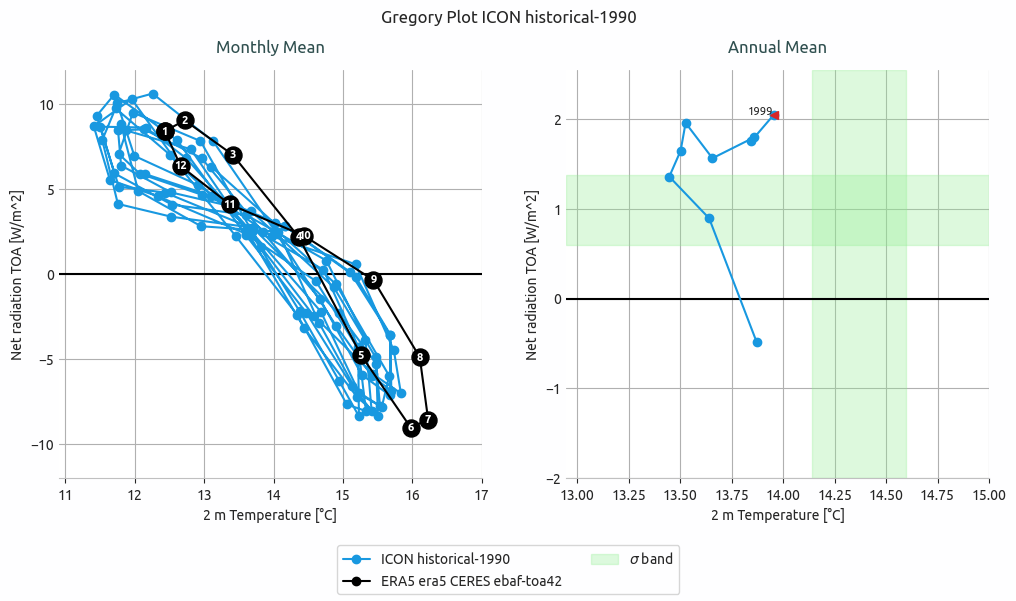

In [10]:
title = plot.set_title()
data_labels = plot.set_data_labels()
ref_label = plot.set_ref_label()
fig = plot.plot(title=title, data_labels=data_labels, ref_label=ref_label)
description = plot.set_description()
plot.save_plot(fig, diagnostic_product='gregory', description=description)